In [15]:
from keras import models
from keras import layers
from keras import activations
from keras import initializers
from keras import regularizers
from keras import optimizers
from keras import losses
from keras import metrics
from keras import callbacks
from keras.preprocessing import image

In [16]:
model = models.Sequential()

model.add(layers.Conv2D(
    32, (5, 5),
    input_shape = (64, 64, 3),
    activation='relu'
))

model.add(layers.MaxPooling2D(
    pool_size=(2,2)
))

model.add(layers.Conv2D(
    16, (5, 5),
    input_shape = (30, 30, 3),
    activation='relu'
))

model.add(layers.MaxPooling2D(
    pool_size=(2,2)
))


model.add(layers.Flatten())

In [17]:
model.add(layers.Dense(128, 
    # kernel_initializer= initializers.RandomNormal(stddev=1), # Valores iniciais aleatórios 
    # bias_initializer=initializers.Zeros()
))
model.add(layers.Activation(activations.relu))

model.add(layers.Dropout(0.4))
model.add(layers.Activation(activations.relu))

model.add(layers.Dense(64, kernel_regularizer= regularizers.L2(1e-4)))
model.add(layers.Activation(activations.relu))

model.add(layers.Dense(32))
model.add(layers.Activation(activations.relu))

model.add(layers.Dense(32))
model.add(layers.Activation(activations.relu))

model.add(layers.Dense(2))
model.add(layers.Activation(activations.softmax))


In [18]:

model.compile(
    optimizer=optimizers.Adam(),
    # Loss : indica o quão esta errado
    loss=losses.BinaryCrossentropy(),
    metrics=[metrics.CategoricalAccuracy(), metrics.Precision()]
)

dataGen = image.ImageDataGenerator(
    rescale= 1.0/255,
    shear_range=0.2, 
    zoom_range=0.2,
    horizontal_flip=False,
    vertical_flip=False,
    validation_split=0.2
)

In [19]:
b_size = 32

X_train = dataGen.flow_from_directory(
    "./images",
    target_size=(64, 64),
    batch_size= b_size,
    class_mode='categorical', # Um neuronico no final pode ser binário, mais de um neuronio precisa ser categorico,
    subset='training'
)

X_test = dataGen.flow_from_directory(
    "./images",
    target_size=(64, 64),
    batch_size= b_size,
    class_mode='categorical', # Um neuronico no final pode ser binário, mais de um neuronio precisa ser categorico,
    subset='validation'
)

import math

image_qtt = X_train.samples
steps_per_epoch = math.floor(image_qtt / b_size)
validation_steps = math.floor(steps_per_epoch / 10)

print(steps_per_epoch)

Found 14209 images belonging to 2 classes.
Found 3551 images belonging to 2 classes.
444


In [23]:

history = model.fit(x=X_train,
    validation_data=X_test,
    steps_per_epoch=steps_per_epoch, 
    epochs=50, 
    validation_steps=validation_steps, 
callbacks=[
        callbacks.EarlyStopping(patience=4),
        callbacks.ModelCheckpoint(
            filepath= './epochs/model_{epoch:02d}_{loss:.2f}.keras'
        )
    ])

Epoch 1/50
444/444 [==============================] - 20s 45ms/step - loss: 0.0100 - categorical_accuracy: 0.9970 - precision_1: 0.9970 - val_loss: 0.0288 - val_categorical_accuracy: 0.9972 - val_precision_1: 0.9972
Epoch 2/50
444/444 [==============================] - 19s 42ms/step - loss: 0.0165 - categorical_accuracy: 0.9956 - precision_1: 0.9956 - val_loss: 0.0086 - val_categorical_accuracy: 0.9972 - val_precision_1: 0.9972
Epoch 3/50
444/444 [==============================] - 19s 42ms/step - loss: 0.0112 - categorical_accuracy: 0.9964 - precision_1: 0.9964 - val_loss: 0.0221 - val_categorical_accuracy: 0.9957 - val_precision_1: 0.9957
Epoch 4/50
444/444 [==============================] - 19s 42ms/step - loss: 0.0154 - categorical_accuracy: 0.9956 - precision_1: 0.9956 - val_loss: 0.0175 - val_categorical_accuracy: 0.9979 - val_precision_1: 0.9979
Epoch 5/50
444/444 [==============================] - 19s 43ms/step - loss: 0.0133 - categorical_accuracy: 0.9962 - precision_1: 0.9962 

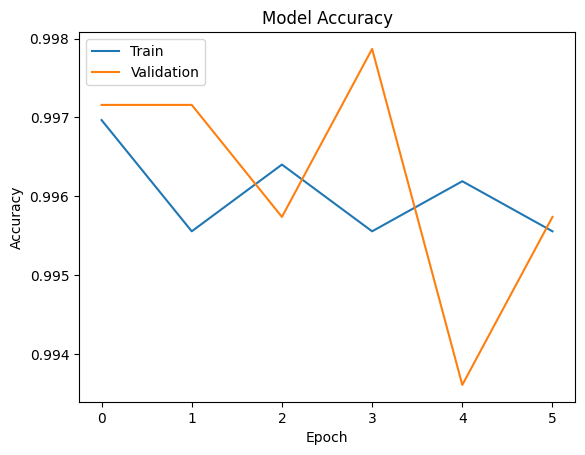

In [24]:
import matplotlib.pyplot as plt

# Plotar curvas de treinamento
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()